# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado
do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

## Equipe:

1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047
2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049
3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006
4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018
5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [1]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


### Bibliotecas necessárias

In [2]:
# Bibliotecas
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from prettytable import PrettyTable
import seaborn as sns

# Módulos
from modules.perceptron import Perceptron

### Parte 1 - Resolvendo um Problema Linearmente Separável

In [3]:
def get_ndarray_from_file(filename: str) -> np.ndarray:
    """Formato dos dados -> (m, 1, 3) : [[[x_1, x_2, y_d]], ...]"""
    return np.squeeze(np.fromfile(filename, dtype=np.float64).reshape(-1, 1, 3))

In [4]:
def split_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Faz split do dataset -> (m, 2), (m, 1)"""
    return data[:, :2], data[:, 2].reshape(-1, 1)

In [5]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X, y = split_data(data)

print(f"data: {data.shape} -> {data[0]}")
print(f"X: {X.shape} | y: {y.shape}")

data: (1000, 3) -> [-363.7884  244.1423    0.    ]
X: (1000, 2) | y: (1000, 1)


In [6]:
array = np.frombuffer(data, dtype=np.float64)
dados = array.reshape(-1, 3)
X = dados[:, :2]
y = dados[:, 2]

perceptron = Perceptron(input_size=2)

print("Pesos iniciais:", perceptron.weights)

Pesos iniciais: [-0.17164976  0.02549326  0.38156906]


In [7]:
# treinamento
y_reshaped = y.reshape(-1, 1)  # Garante que y tem a forma (n, 1)
epocas, ajustes = perceptron.train(X, y_reshaped, learning_rate=0.1)
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até a convergência: {epocas}")


Total de ajustes: 985
Épocas até a convergência: 6


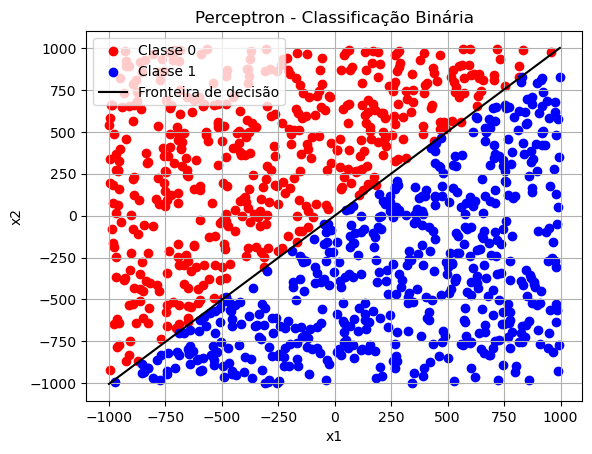

In [8]:
# plotagem
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()

### Parte 2 - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico. Usaremos, então, o arquivo ```data3.txt```.

Aproveitando o algoritmo construído na seção 2.1, serão executadas 10 repetições deste para seguintes configurações: $\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$, em que I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.

In [9]:
tabela = PrettyTable([
    "Taxa de aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes",
    "Menor número de épocas para convergência"
])

In [10]:
data = get_ndarray_from_file(f"./data/data{id}.txt")
X3, y3 = split_data(data)

In [11]:
intervals = ((-0.5, 0.5), (-100, 100))
learning_rates = (0.4, 0.1, 0.01)

In [12]:
# execução do algoritmo para o intervalo (-0.5, 0.5)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[0])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[0][0]}, {intervals[0][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{min_epochs}"])


In [13]:
# execução do algoritmo para o intervalo (-100, 100)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[1])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[1][0]}, {intervals[1][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{"Não convergiu" if min_epochs < 0 else min_epochs}"])

TypeError: '<' not supported between instances of 'tuple' and 'int'

In [ ]:
tabela

Taxa de aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0.4,"-0.5, 0.5",431.2 +- 426.8,"(4, 760)"
0.1,"-0.5, 0.5",475.0 +- 467.1,"(5, 816)"
0.01,"-0.5, 0.5",420.9 +- 431.1,"(8, 918)"


### Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

In [14]:
data = get_ndarray_from_file(f"./data/dataHoldout.txt")
X, y = split_data(data)

In [15]:
array = np.frombuffer(data, dtype=np.float64)
dados = array.reshape(-1, 3)
dados
X = dados[:, :2]
y = dados[:, 2]

perceptron = Perceptron(input_size=2)

print("Pesos iniciais:", perceptron.weights)

Pesos iniciais: [ 0.40504289  0.31093438 -0.12687913]


### Gráfico mostrando que o problema é não-linearmente separável

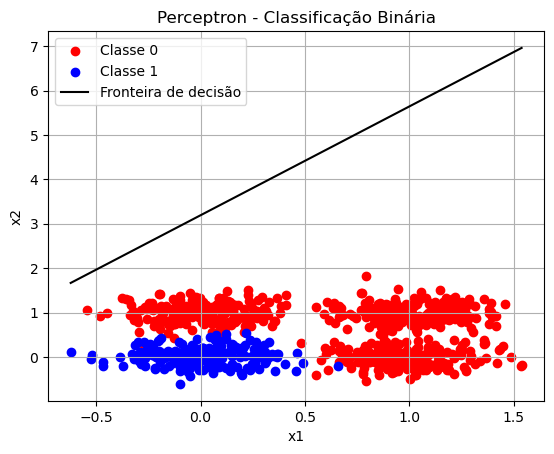

In [16]:
# plotagem do problema não linearmente separável
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()

In [17]:
#Separa as partes de treino e de teste com base no tamanho de treino 
def train_test_split(data: np.ndarray, train_size:float) -> tuple[np.ndarray, np.ndarray, np.ndarray,np.ndarray]:
    np.random.seed(id)
    random_dataset = data[np.random.permutation(len(data))]
    bound = int(len(data)*train_size)
    return random_dataset[:bound, :2], random_dataset[bound:, :2],random_dataset[:bound,2].reshape(-1, 1), random_dataset[bound:,2].reshape(-1, 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, train_size=0.7)

In [19]:
# Executando o treino por 100 épocas e imprimindo os pesos
for i in range(100):
    perceptron.train(X_train, y_train, learning_rate=0.1, max_epochs=1)
    print(perceptron.weights)


[-40.69495711 -26.64172418 -27.25961655]
[-25.79495711 -26.40038872 -26.8488384 ]
[-10.89495711 -26.15905327 -26.43806025]
[  2.90504289 -25.56790078 -25.81889425]
[  9.00504289 -24.59715082 -24.84309581]
[ 10.80504289 -24.1936501  -24.27615566]
[ 11.40504289 -24.11441471 -23.87551258]
[ 11.50504289 -24.20457723 -23.53242302]
[ 11.60504289 -24.29473976 -23.18933346]
[ 11.50504289 -24.35720098 -22.97339013]
[ 11.50504289 -24.34775643 -22.7833183 ]
[ 11.50504289 -24.33831187 -22.59324647]
[ 11.40504289 -24.35013267 -22.43107379]
[ 11.40504289 -24.2180789  -22.37404836]
[ 11.20504289 -24.18521436 -22.31118416]
[ 11.40504289 -24.03181916 -22.17604133]
[ 11.20504289 -23.99895462 -22.11317713]
[ 11.30504289 -23.91158619 -21.95684322]
[ 11.10504289 -23.87872165 -21.89397902]
[ 11.20504289 -23.68064111 -21.85814466]
[ 11.00504289 -23.64777657 -21.79528046]
[ 11.10504289 -23.56040814 -21.63894655]
[ 10.90504289 -23.52754361 -21.57608235]
[ 11.10504289 -23.3741484  -21.44093952]
[ 10.90504289 -2

In [20]:
# Gerar previsões (1 amostra por vez) 
y_pred = []

for x in X_test:
    y_pred.append(perceptron.predict(x))

# Matriz de confusão
cm = skm.confusion_matrix(y_test, y_pred)

# Relatório detalhado (acurácia, precisão, recall, F1)
rep = skm.classification_report(y_test, y_pred, digits=4)

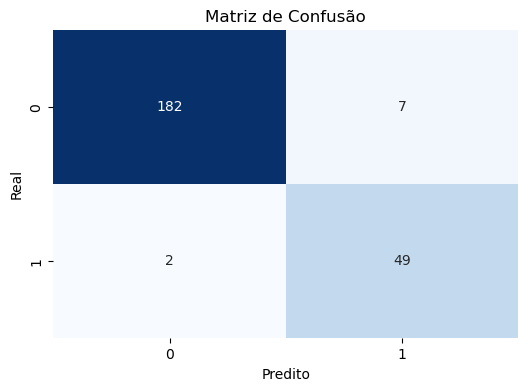

In [21]:
# Plot da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [22]:
# Acurácia
accuracy = skm.accuracy_score(y_test, y_pred)
print(accuracy)

0.9625


In [23]:
print("\nRelatório de Classificação:")
print(rep)


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0     0.9891    0.9630    0.9759       189
         1.0     0.8750    0.9608    0.9159        51

    accuracy                         0.9625       240
   macro avg     0.9321    0.9619    0.9459       240
weighted avg     0.9649    0.9625    0.9631       240



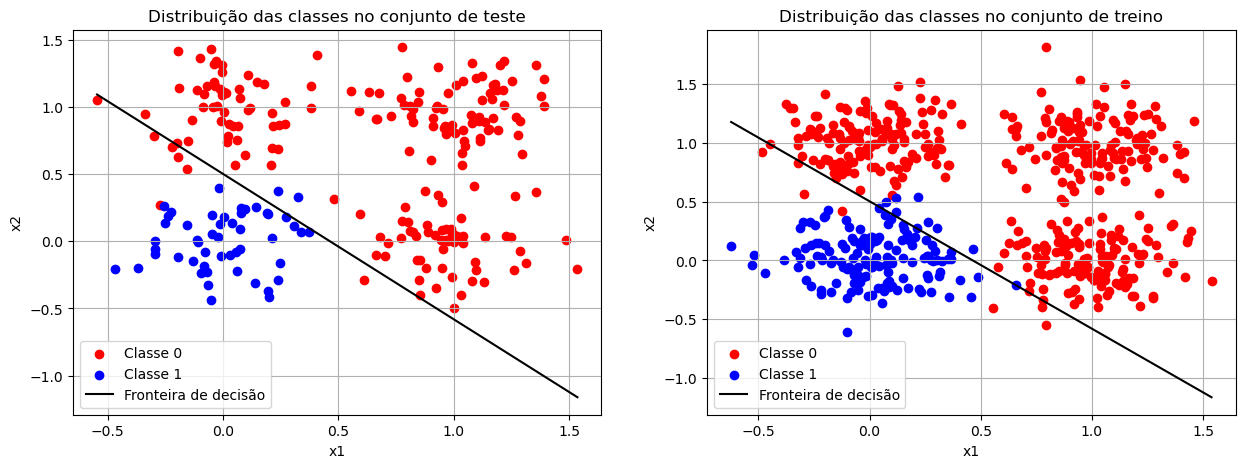

In [37]:
y_test_flat = y_test.ravel()  # ou: y_test.flatten()
y_train_flat = y_train.ravel()

#casos de teste
classe_0 = X_test[y_test_flat == 0]
classe_1 = X_test[y_test_flat == 1]

#casos de treino
classe_0t = X_train[y_train_flat == 0]
classe_1t = X_train[y_train_flat == 1]

w = perceptron.weights
x_vals = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]

fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
axs[0].scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Distribuição das classes no conjunto de teste')
axs[0].plot(x_vals,y_vals,color='black',label='Fronteira de decisão')
axs[0].grid(True)
axs[0].legend()

w = perceptron.weights
x_vals = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]

axs[1].scatter(classe_0t[:, 0], classe_0t[:, 1], color='red', label='Classe 0')
axs[1].scatter(classe_1t[:, 0], classe_1t[:, 1], color='blue', label='Classe 1')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Distribuição das classes no conjunto de treino')
axs[1].plot(x_vals,y_vals,color='black',label='Fronteira de decisão')
axs[1].grid(True)
axs[1].legend()

plt.show()


O modelo classificou muito bem apesar do problema ser linearmente não separável, isso mostra que os dados apresentam alguma aproximação linear com a fronteira de decisão, mesmo com o desbalanceamento de classes.
O Perceptron de Rosemblatt se mostra confiável com essas métricas 